# ****Global Trade Dynamics: Annual Import and Export Trends (2010-2023)****
### **Introduction**
The WTO Stats portal contains statistical indicators related to WTO issues. Available time series cover merchandise trade and trade in services statistics (annual, quarterly and monthly), market access indicators (bound, applied & preferential tariffs), non-tariff information as well as other indicators.

**I got import and export data between 2010 and 2023 by country from the WTO Stats portal.**


### **Import Libraries**
First, let's download the necessary libraries

In [148]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### **Load and Check Data**
I have two datasets, one contains import data and the other contains export data.

In [149]:
imports = pd.read_excel(r"Merchandise imports by product group – annual.xlsx")
imports

,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,World,SI3_AGG - TO - Total merchandise,World,15444226.000,18444202.000,18669918.000,18979776.000,19080123.000,16739984.000,16208885.000,17976603.000,19816989.000,19342966.000,17879648.000,22594192.000,25699928.000,24234635.000
1,World,SI3_AGG - AG - Agricultural products,World,1391529.000,1701893.000,1681611.000,1756648.000,1774487.000,1600802.000,1603427.000,1758914.000,1850860.000,1830801.000,1846833.000,2201411.000,2432287.000,NaN
2,World,SI3_AGG - AGFO - Food,World,1144082.000,1387912.000,1391766.000,1465158.000,1484988.000,1345900.000,1357687.000,1486896.000,1556664.000,1562541.000,1603591.000,1879290.000,2089079.000,NaN
3,World,SI3_AGG - MI - Fuels and mining products,World,3183852.000,4278365.000,4227403.000,4208130.000,3836963.000,2492189.000,2129679.000,2758899.000,3415352.000,3187611.000,2440829.000,3841586.000,5366296.000,NaN
4,World,SI3_AGG - MIFU - Fuels,World,2462969.000,3361172.000,3401742.000,3403308.000,3058286.000,1861359.000,1532924.000,2008076.000,2574768.000,2364495.000,1608913.000,2599488.000,4106053.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Zimbabwe,SI3_AGG - MAMTOTIC - Integrated circuits and e...,World,8.000,8.000,8.000,11.000,12.000,11.000,9.000,13.000,19.000,28.000,32.000,21.000,35.000,NaN
3481,Zimbabwe,SI3_AGG - MAMTTE - Transport equipment,World,994.000,924.000,964.000,572.000,443.000,470.000,354.000,346.000,659.000,388.000,324.000,611.000,729.000,NaN
3482,Zimbabwe,SI3_AGG - MAMTAU - Automotive products,World,954.000,864.000,909.000,522.000,389.000,420.000,307.000,308.000,571.000,320.000,249.000,492.000,574.000,NaN
3483,Zimbabwe,SI3_AGG - MATE - Textiles,World,67.000,88.000,91.000,87.000,83.000,73.000,53.000,62.000,80.000,66.000,80.000,107.000,85.000,NaN


In [150]:
exports = pd.read_excel(r"Merchandise exports by product group – annual.xlsx")
exports

,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,World,SI3_AGG - TO - Total merchandise,World,15301577.000,18337496.000,18511253.000,18961626.000,19005073.000,16560106.000,16041463.000,17741864.000,19553285.000,19018050.000,17652901.000,22319011.000,24917463.000,23783494.000
1,World,SI3_AGG - AG - Agricultural products,World,1354429.000,1649389.000,1655099.000,1731531.000,1746687.000,1565686.000,1585693.000,1731381.000,1810271.000,1788200.000,1809475.000,2148665.000,2325521.000,NaN
2,World,SI3_AGG - AGFO - Food,World,1115790.000,1350316.000,1369778.000,1445339.000,1480252.000,1332886.000,1357202.000,1473948.000,1533561.000,1533159.000,1573538.000,1836335.000,2007666.000,NaN
3,World,SI3_AGG - MI - Fuels and mining products,World,3074398.000,4122493.000,4164125.000,4051300.000,3720251.000,2380017.000,2033684.000,2611396.000,3264056.000,3102597.000,2326889.000,3670710.000,4950975.000,NaN
4,World,SI3_AGG - MIFU - Fuels,World,2395065.000,3268505.000,3399965.000,3309479.000,3026072.000,1808811.000,1492255.000,1948478.000,2528513.000,2370333.000,1571511.000,2555970.000,3865877.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,Zimbabwe,SI3_AGG - MAMTOTIC - Integrated circuits and e...,World,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
3440,Zimbabwe,SI3_AGG - MAMTTE - Transport equipment,World,17.000,15.000,26.000,28.000,18.000,12.000,13.000,14.000,11.000,27.000,11.000,7.000,17.000,NaN
3441,Zimbabwe,SI3_AGG - MAMTAU - Automotive products,World,8.000,9.000,9.000,11.000,10.000,5.000,4.000,6.000,3.000,4.000,3.000,3.000,2.000,NaN
3442,Zimbabwe,SI3_AGG - MATE - Textiles,World,18.000,17.000,20.000,24.000,16.000,16.000,11.000,7.000,9.000,7.000,6.000,10.000,7.000,NaN


First, lets look at the imports dataset

In [151]:
imports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reporting Economy  3485 non-null   object 
 1   Product/Sector     3485 non-null   object 
 2   Partner Economy    3485 non-null   object 
 3   2010               3317 non-null   float64
 4   2011               3336 non-null   float64
 5   2012               3324 non-null   float64
 6   2013               3321 non-null   float64
 7   2014               3310 non-null   float64
 8   2015               3309 non-null   float64
 9   2016               3312 non-null   float64
 10  2017               3345 non-null   float64
 11  2018               3363 non-null   float64
 12  2019               3382 non-null   float64
 13  2020               3399 non-null   float64
 14  2021               3400 non-null   float64
 15  2022               3400 non-null   float64
 16  2023               265 n

If we examine the imports, there is a lot of missing data from 2023. It does not seem possible to fill it in because there is a deficiency of almost 90 percent. 
The year 2023 can then be filled in with linear regression and the correct information can be checked if available from a different source.

 On the other hand, the number of countries providing data may have increased after 2010 or new countries may have been included. For example, South Sudan became a new country in 2011.

In [152]:
exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3444 entries, 0 to 3443
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reporting Economy  3444 non-null   object 
 1   Product/Sector     3444 non-null   object 
 2   Partner Economy    3444 non-null   object 
 3   2010               3170 non-null   float64
 4   2011               3193 non-null   float64
 5   2012               3233 non-null   float64
 6   2013               3205 non-null   float64
 7   2014               3239 non-null   float64
 8   2015               3252 non-null   float64
 9   2016               3253 non-null   float64
 10  2017               3286 non-null   float64
 11  2018               3304 non-null   float64
 12  2019               3334 non-null   float64
 13  2020               3360 non-null   float64
 14  2021               3355 non-null   float64
 15  2022               3358 non-null   float64
 16  2023               265 n

Almost everything we said for imports is valid for exports. However, we see that the number of extra countries is low. It seems likely that it will be a country that does not export at all.

Let's look at the number of empty rows

In [153]:
print("#####################Exports#####################\n",exports.isnull().sum(),"\n\n","#####################Imports#####################\n",imports.isnull().sum())

#####################Exports#####################
 Reporting Economy       0
Product/Sector          0
Partner Economy         0
2010                  274
2011                  251
2012                  211
2013                  239
2014                  205
2015                  192
2016                  191
2017                  158
2018                  140
2019                  110
2020                   84
2021                   89
2022                   86
2023                 3179
dtype: int64 

 #####################Imports#####################
 Reporting Economy       0
Product/Sector          0
Partner Economy         0
2010                  168
2011                  149
2012                  161
2013                  164
2014                  175
2015                  176
2016                  173
2017                  140
2018                  122
2019                  103
2020                   86
2021                   85
2022                   85
2023                 322

📌There are 265 different Reporting Economy in the information above and what caught my attention is that the full amount in 2023 is 265 and when I checked the data set, I realized that these belong to Total merchandise, when we look at total imports and exports. 

These will be useful to us. This means that some countries only have aggregate data and not by product type.

In [154]:
print("#####################Exports#####################\n",exports.value_counts("Reporting Economy"),"\n\n","#####################Imports#####################\n",imports.value_counts("Reporting Economy"))

#####################Exports#####################
 Reporting Economy
European Union                            54
Afghanistan                               18
Maldives                                  18
Malta                                     18
Mauritania                                18
                                          ..
European Free Trade Association (EFTA)     1
Central American Common Market (CACM)      1
Chad                                       1
Europe                                     1
LDC non-fuel mineral exporters             1
Name: count, Length: 265, dtype: int64 

 #####################Imports#####################
 Reporting Economy
European Union                    54
Afghanistan                       18
Mali                              18
Mauritania                        18
Mauritius                         18
                                  ..
Niue                               1
Cuba                               1
Curaçao                      

The reporting economy numbers are equal, so we can say that some lines, that is, some data of those countries, are missing.

Let's turn these two sets into a single data set so that we can find more meaningful visuals or relationships.

**Before merging, let's add separate imports and exports columns to each data set so that we have a useful data set that will reveal their differences when merging.**


In [155]:
mercantile_imports=[]
for i in range(len(imports)):
    mercantile_imports.append("Import")

imports["Mercantile_type"]=mercantile_imports
imports

,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Mercantile_type
0,World,SI3_AGG - TO - Total merchandise,World,15444226.000,18444202.000,18669918.000,18979776.000,19080123.000,16739984.000,16208885.000,17976603.000,19816989.000,19342966.000,17879648.000,22594192.000,25699928.000,24234635.000,Import
1,World,SI3_AGG - AG - Agricultural products,World,1391529.000,1701893.000,1681611.000,1756648.000,1774487.000,1600802.000,1603427.000,1758914.000,1850860.000,1830801.000,1846833.000,2201411.000,2432287.000,NaN,Import
2,World,SI3_AGG - AGFO - Food,World,1144082.000,1387912.000,1391766.000,1465158.000,1484988.000,1345900.000,1357687.000,1486896.000,1556664.000,1562541.000,1603591.000,1879290.000,2089079.000,NaN,Import
3,World,SI3_AGG - MI - Fuels and mining products,World,3183852.000,4278365.000,4227403.000,4208130.000,3836963.000,2492189.000,2129679.000,2758899.000,3415352.000,3187611.000,2440829.000,3841586.000,5366296.000,NaN,Import
4,World,SI3_AGG - MIFU - Fuels,World,2462969.000,3361172.000,3401742.000,3403308.000,3058286.000,1861359.000,1532924.000,2008076.000,2574768.000,2364495.000,1608913.000,2599488.000,4106053.000,NaN,Import
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,Zimbabwe,SI3_AGG - MAMTOTIC - Integrated circuits and e...,World,8.000,8.000,8.000,11.000,12.000,11.000,9.000,13.000,19.000,28.000,32.000,21.000,35.000,NaN,Import
3481,Zimbabwe,SI3_AGG - MAMTTE - Transport equipment,World,994.000,924.000,964.000,572.000,443.000,470.000,354.000,346.000,659.000,388.000,324.000,611.000,729.000,NaN,Import
3482,Zimbabwe,SI3_AGG - MAMTAU - Automotive products,World,954.000,864.000,909.000,522.000,389.000,420.000,307.000,308.000,571.000,320.000,249.000,492.000,574.000,NaN,Import
3483,Zimbabwe,SI3_AGG - MATE - Textiles,World,67.000,88.000,91.000,87.000,83.000,73.000,53.000,62.000,80.000,66.000,80.000,107.000,85.000,NaN,Import


In [156]:
mercantile_exports=[]
for i in range(len(exports)):
    mercantile_exports.append("Export")

exports["Mercantile_type"]=mercantile_exports
exports

,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Mercantile_type
0,World,SI3_AGG - TO - Total merchandise,World,15301577.000,18337496.000,18511253.000,18961626.000,19005073.000,16560106.000,16041463.000,17741864.000,19553285.000,19018050.000,17652901.000,22319011.000,24917463.000,23783494.000,Export
1,World,SI3_AGG - AG - Agricultural products,World,1354429.000,1649389.000,1655099.000,1731531.000,1746687.000,1565686.000,1585693.000,1731381.000,1810271.000,1788200.000,1809475.000,2148665.000,2325521.000,NaN,Export
2,World,SI3_AGG - AGFO - Food,World,1115790.000,1350316.000,1369778.000,1445339.000,1480252.000,1332886.000,1357202.000,1473948.000,1533561.000,1533159.000,1573538.000,1836335.000,2007666.000,NaN,Export
3,World,SI3_AGG - MI - Fuels and mining products,World,3074398.000,4122493.000,4164125.000,4051300.000,3720251.000,2380017.000,2033684.000,2611396.000,3264056.000,3102597.000,2326889.000,3670710.000,4950975.000,NaN,Export
4,World,SI3_AGG - MIFU - Fuels,World,2395065.000,3268505.000,3399965.000,3309479.000,3026072.000,1808811.000,1492255.000,1948478.000,2528513.000,2370333.000,1571511.000,2555970.000,3865877.000,NaN,Export
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,Zimbabwe,SI3_AGG - MAMTOTIC - Integrated circuits and e...,World,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,Export
3440,Zimbabwe,SI3_AGG - MAMTTE - Transport equipment,World,17.000,15.000,26.000,28.000,18.000,12.000,13.000,14.000,11.000,27.000,11.000,7.000,17.000,NaN,Export
3441,Zimbabwe,SI3_AGG - MAMTAU - Automotive products,World,8.000,9.000,9.000,11.000,10.000,5.000,4.000,6.000,3.000,4.000,3.000,3.000,2.000,NaN,Export
3442,Zimbabwe,SI3_AGG - MATE - Textiles,World,18.000,17.000,20.000,24.000,16.000,16.000,11.000,7.000,9.000,7.000,6.000,10.000,7.000,NaN,Export


Since they both have the same column names, we can combine them and then group them into the format we want.

In [157]:
merged_data = pd.concat([imports, exports])
merged_data

,Reporting Economy,Product/Sector,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Mercantile_type
0,World,SI3_AGG - TO - Total merchandise,World,15444226.000,18444202.000,18669918.000,18979776.000,19080123.000,16739984.000,16208885.000,17976603.000,19816989.000,19342966.000,17879648.000,22594192.000,25699928.000,24234635.000,Import
1,World,SI3_AGG - AG - Agricultural products,World,1391529.000,1701893.000,1681611.000,1756648.000,1774487.000,1600802.000,1603427.000,1758914.000,1850860.000,1830801.000,1846833.000,2201411.000,2432287.000,NaN,Import
2,World,SI3_AGG - AGFO - Food,World,1144082.000,1387912.000,1391766.000,1465158.000,1484988.000,1345900.000,1357687.000,1486896.000,1556664.000,1562541.000,1603591.000,1879290.000,2089079.000,NaN,Import
3,World,SI3_AGG - MI - Fuels and mining products,World,3183852.000,4278365.000,4227403.000,4208130.000,3836963.000,2492189.000,2129679.000,2758899.000,3415352.000,3187611.000,2440829.000,3841586.000,5366296.000,NaN,Import
4,World,SI3_AGG - MIFU - Fuels,World,2462969.000,3361172.000,3401742.000,3403308.000,3058286.000,1861359.000,1532924.000,2008076.000,2574768.000,2364495.000,1608913.000,2599488.000,4106053.000,NaN,Import
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3439,Zimbabwe,SI3_AGG - MAMTOTIC - Integrated circuits and e...,World,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN,Export
3440,Zimbabwe,SI3_AGG - MAMTTE - Transport equipment,World,17.000,15.000,26.000,28.000,18.000,12.000,13.000,14.000,11.000,27.000,11.000,7.000,17.000,NaN,Export
3441,Zimbabwe,SI3_AGG - MAMTAU - Automotive products,World,8.000,9.000,9.000,11.000,10.000,5.000,4.000,6.000,3.000,4.000,3.000,3.000,2.000,NaN,Export
3442,Zimbabwe,SI3_AGG - MATE - Textiles,World,18.000,17.000,20.000,24.000,16.000,16.000,11.000,7.000,9.000,7.000,6.000,10.000,7.000,NaN,Export


To convert a grouped data set back into a DataFrame, you need to perform a sum or transformation operation on the groupby object. 

📌For this, I used the sum() function and with the reset_index() function we obtained a DataFrame by converting the multiple indexes created during the grouping process into columns.

In [158]:
grouped_data = merged_data.groupby(['Reporting Economy','Product/Sector','Mercantile_type'])
TradeData=grouped_data.sum().reset_index()
TradeData

,Reporting Economy,Product/Sector,Mercantile_type,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,SI3_AGG - AG - Agricultural products,Export,World,197.000,196.000,76.000,70.000,83.000,361.000,437.000,637.000,725.000,730.000,694.000,732.000,650.000,0.000
1,Afghanistan,SI3_AGG - AG - Agricultural products,Import,World,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,3013.000,2656.000,2458.000,2529.000,2279.000,2796.000,0.000
2,Afghanistan,SI3_AGG - AGFO - Food,Export,World,156.000,147.000,75.000,70.000,83.000,277.000,339.000,495.000,579.000,548.000,529.000,545.000,418.000,0.000
3,Afghanistan,SI3_AGG - AGFO - Food,Import,World,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,2867.000,2521.000,2306.000,2472.000,2240.000,2770.000,0.000
4,Afghanistan,SI3_AGG - MA - Manufactures,Export,World,76.000,53.000,73.000,73.000,84.000,91.000,39.000,34.000,34.000,44.000,25.000,143.000,37.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,Zimbabwe,SI3_AGG - MI - Fuels and mining products,Import,World,1054.000,1352.000,1565.000,1702.000,1647.000,1616.000,1528.000,1529.000,1865.000,1502.000,865.000,1501.000,1737.000,0.000
6853,Zimbabwe,SI3_AGG - MIFU - Fuels,Export,World,47.000,29.000,38.000,33.000,14.000,65.000,19.000,25.000,41.000,48.000,48.000,94.000,190.000,0.000
6854,Zimbabwe,SI3_AGG - MIFU - Fuels,Import,World,936.000,1251.000,1510.000,1615.000,1564.000,1582.000,1503.000,1494.000,1823.000,1461.000,814.000,1424.000,1647.000,0.000
6855,Zimbabwe,SI3_AGG - TO - Total merchandise,Export,World,3199.000,3512.000,3882.000,3907.000,3866.000,3248.000,3335.000,3481.000,4057.000,4269.000,4395.000,6036.000,6586.000,7225.000


### **Understanding Data**
We reduced both of our data to one data. Now let's examine this data in more detail.

First, let's look at a small part of our data, for example the "SI3_AGG - TO - Total merchandise" part.

In [159]:
TradeData.loc[TradeData["Product/Sector"]=="SI3_AGG - TO - Total merchandise"]

,Reporting Economy,Product/Sector,Mercantile_type,Partner Economy,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
34,Afghanistan,SI3_AGG - TO - Total merchandise,Export,World,388.000,376.000,429.000,515.000,570.000,571.000,596.000,723.000,875.000,864.000,777.000,850.000,819.000,903.000
35,Afghanistan,SI3_AGG - TO - Total merchandise,Import,World,5154.000,6515.000,9069.000,8554.000,7729.000,7723.000,6534.000,7065.000,7407.000,6777.000,6538.000,5308.000,5529.000,6064.000
36,Africa,SI3_AGG - TO - Total merchandise,Export,World,519226.000,612730.000,639722.000,597330.000,570579.000,403199.000,366356.000,434954.000,512301.000,482660.000,396761.000,563614.000,658261.000,598222.000
37,Africa,SI3_AGG - TO - Total merchandise,Import,World,481425.000,573355.000,623974.000,650395.000,655103.000,569798.000,503792.000,523595.000,588762.000,596030.000,489664.000,614955.000,748806.000,691002.000
38,"Africa, CIS and Middle East",SI3_AGG - TO - Total merchandise,Export,World,1960691.000,2591171.000,2731078.000,2662276.000,2507531.000,1751530.000,1564078.000,1845764.000,2273911.000,2123466.000,1662318.000,2378025.000,3042797.000,2602040.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6784,Yemen,SI3_AGG - TO - Total merchandise,Import,World,9255.000,10034.000,11260.000,13273.000,12042.000,6573.000,3080.000,3088.000,3312.000,4721.000,4676.000,5054.000,5289.000,5031.000
6819,Zambia,SI3_AGG - TO - Total merchandise,Export,World,7200.000,9001.000,9365.000,10607.000,9694.000,6607.000,6372.000,8000.000,9034.000,7039.000,7924.000,10101.000,11664.000,9652.000
6820,Zambia,SI3_AGG - TO - Total merchandise,Import,World,5321.000,7178.000,8805.000,10586.000,9707.000,7935.000,7290.000,7988.000,9466.000,7173.000,5285.000,6435.000,9050.000,9324.000
6855,Zimbabwe,SI3_AGG - TO - Total merchandise,Export,World,3199.000,3512.000,3882.000,3907.000,3866.000,3248.000,3335.000,3481.000,4057.000,4269.000,4395.000,6036.000,6586.000,7225.000


veri setimizden gereksiz olan sütunları çıkaralım. Partner Economyde işimize yaramadığı için silelim

In [160]:
TradeData.drop(columns="Partner Economy", inplace=True)
TradeData

,Reporting Economy,Product/Sector,Mercantile_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,SI3_AGG - AG - Agricultural products,Export,197.000,196.000,76.000,70.000,83.000,361.000,437.000,637.000,725.000,730.000,694.000,732.000,650.000,0.000
1,Afghanistan,SI3_AGG - AG - Agricultural products,Import,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,3013.000,2656.000,2458.000,2529.000,2279.000,2796.000,0.000
2,Afghanistan,SI3_AGG - AGFO - Food,Export,156.000,147.000,75.000,70.000,83.000,277.000,339.000,495.000,579.000,548.000,529.000,545.000,418.000,0.000
3,Afghanistan,SI3_AGG - AGFO - Food,Import,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,2867.000,2521.000,2306.000,2472.000,2240.000,2770.000,0.000
4,Afghanistan,SI3_AGG - MA - Manufactures,Export,76.000,53.000,73.000,73.000,84.000,91.000,39.000,34.000,34.000,44.000,25.000,143.000,37.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,Zimbabwe,SI3_AGG - MI - Fuels and mining products,Import,1054.000,1352.000,1565.000,1702.000,1647.000,1616.000,1528.000,1529.000,1865.000,1502.000,865.000,1501.000,1737.000,0.000
6853,Zimbabwe,SI3_AGG - MIFU - Fuels,Export,47.000,29.000,38.000,33.000,14.000,65.000,19.000,25.000,41.000,48.000,48.000,94.000,190.000,0.000
6854,Zimbabwe,SI3_AGG - MIFU - Fuels,Import,936.000,1251.000,1510.000,1615.000,1564.000,1582.000,1503.000,1494.000,1823.000,1461.000,814.000,1424.000,1647.000,0.000
6855,Zimbabwe,SI3_AGG - TO - Total merchandise,Export,3199.000,3512.000,3882.000,3907.000,3866.000,3248.000,3335.000,3481.000,4057.000,4269.000,4395.000,6036.000,6586.000,7225.000


Let's examine in which sectors they import and export.

In [161]:
TradeData.value_counts("Product/Sector")

Product/Sector
SI3_AGG - TO - Total merchandise                                        530
SI3_AGG - AGFO - Food                                                   375
SI3_AGG - MI - Fuels and mining products                                375
SI3_AGG - AG - Agricultural products                                    375
SI3_AGG - MA - Manufactures                                             375
SI3_AGG - MIFU - Fuels                                                  374
SI3_AGG - MACL - Clothing                                               373
SI3_AGG - MAMT - Machinery and transport equipment                      373
SI3_AGG - MACH - Chemicals                                              373
SI3_AGG - MATE - Textiles                                               372
SI3_AGG - MAIS - Iron and steel                                         371
SI3_AGG - MAMTOTEP - Electronic data processing and office equipment    371
SI3_AGG - MAMTOF - Office and telecom equipment                         3

As we know, there are only 209 countries in the world, which means that different organizations are included in our data, but I want to keep only the countries, not them.

In [162]:
TradeData.value_counts("Reporting Economy")

Reporting Economy
Afghanistan                               36
Namibia                                   36
Malta                                     36
Mauritania                                36
Mauritius                                 36
                                          ..
European Free Trade Association (EFTA)     2
Central American Common Market (CACM)      2
Chad                                       2
Europe                                     2
LDC non-fuel mineral exporters             2
Name: count, Length: 265, dtype: int64

I have a data containing countries and their codes, I will load it and create a data that gets the matching ones.

In [163]:
countrycodes = pd.read_excel(r"countrycode.xlsx")
countrycodes

,Code,ISO 3 code,Description,Dates
0,AE,ARE,United Arab Emirates,NaN
1,AF,AFG,Afghanistan,NaN
2,AG,ATG,Antigua and Barbuda,NaN
3,AI,AIA,Anguilla,NaN
4,AL,ALB,Albania,NaN
...,...,...,...,...
195,YE,YEM,Yemen,NaN
196,YU,SCG,Serbia and Montenegro,only 2005
197,ZA,ZAF,South Africa,NaN
198,ZM,ZMB,Zambia,NaN


In [164]:
merged_data = pd.merge(TradeData, countrycodes, left_on='Reporting Economy', right_on='Description')
merged_data

,Reporting Economy,Product/Sector,Mercantile_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Code,ISO 3 code,Description,Dates
0,Afghanistan,SI3_AGG - AG - Agricultural products,Export,197.000,196.000,76.000,70.000,83.000,361.000,437.000,637.000,725.000,730.000,694.000,732.000,650.000,0.000,AF,AFG,Afghanistan,NaN
1,Afghanistan,SI3_AGG - AG - Agricultural products,Import,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,3013.000,2656.000,2458.000,2529.000,2279.000,2796.000,0.000,AF,AFG,Afghanistan,NaN
2,Afghanistan,SI3_AGG - AGFO - Food,Export,156.000,147.000,75.000,70.000,83.000,277.000,339.000,495.000,579.000,548.000,529.000,545.000,418.000,0.000,AF,AFG,Afghanistan,NaN
3,Afghanistan,SI3_AGG - AGFO - Food,Import,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,2867.000,2521.000,2306.000,2472.000,2240.000,2770.000,0.000,AF,AFG,Afghanistan,NaN
4,Afghanistan,SI3_AGG - MA - Manufactures,Export,76.000,53.000,73.000,73.000,84.000,91.000,39.000,34.000,34.000,44.000,25.000,143.000,37.000,0.000,AF,AFG,Afghanistan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,Zimbabwe,SI3_AGG - MI - Fuels and mining products,Import,1054.000,1352.000,1565.000,1702.000,1647.000,1616.000,1528.000,1529.000,1865.000,1502.000,865.000,1501.000,1737.000,0.000,ZW,ZWE,Zimbabwe,NaN
6449,Zimbabwe,SI3_AGG - MIFU - Fuels,Export,47.000,29.000,38.000,33.000,14.000,65.000,19.000,25.000,41.000,48.000,48.000,94.000,190.000,0.000,ZW,ZWE,Zimbabwe,NaN
6450,Zimbabwe,SI3_AGG - MIFU - Fuels,Import,936.000,1251.000,1510.000,1615.000,1564.000,1582.000,1503.000,1494.000,1823.000,1461.000,814.000,1424.000,1647.000,0.000,ZW,ZWE,Zimbabwe,NaN
6451,Zimbabwe,SI3_AGG - TO - Total merchandise,Export,3199.000,3512.000,3882.000,3907.000,3866.000,3248.000,3335.000,3481.000,4057.000,4269.000,4395.000,6036.000,6586.000,7225.000,ZW,ZWE,Zimbabwe,NaN


404 rows were deleted.

In [165]:
merged_data.value_counts("Reporting Economy")

Reporting Economy
Afghanistan             36
Norway                  36
Myanmar                 36
Namibia                 36
Nepal                   36
                        ..
Curaçao                  2
Anguilla                 2
Guinea-Bissau            2
Netherlands Antilles     2
Djibouti                 2
Name: count, Length: 193, dtype: int64

The data looks correct, now let's delete the unnecessary data.

In [166]:
TradeData=merged_data.drop(columns=["Description","Code","Dates","ISO 3 code"])
TradeData

,Reporting Economy,Product/Sector,Mercantile_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,SI3_AGG - AG - Agricultural products,Export,197.000,196.000,76.000,70.000,83.000,361.000,437.000,637.000,725.000,730.000,694.000,732.000,650.000,0.000
1,Afghanistan,SI3_AGG - AG - Agricultural products,Import,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,3013.000,2656.000,2458.000,2529.000,2279.000,2796.000,0.000
2,Afghanistan,SI3_AGG - AGFO - Food,Export,156.000,147.000,75.000,70.000,83.000,277.000,339.000,495.000,579.000,548.000,529.000,545.000,418.000,0.000
3,Afghanistan,SI3_AGG - AGFO - Food,Import,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,2867.000,2521.000,2306.000,2472.000,2240.000,2770.000,0.000
4,Afghanistan,SI3_AGG - MA - Manufactures,Export,76.000,53.000,73.000,73.000,84.000,91.000,39.000,34.000,34.000,44.000,25.000,143.000,37.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,Zimbabwe,SI3_AGG - MI - Fuels and mining products,Import,1054.000,1352.000,1565.000,1702.000,1647.000,1616.000,1528.000,1529.000,1865.000,1502.000,865.000,1501.000,1737.000,0.000
6449,Zimbabwe,SI3_AGG - MIFU - Fuels,Export,47.000,29.000,38.000,33.000,14.000,65.000,19.000,25.000,41.000,48.000,48.000,94.000,190.000,0.000
6450,Zimbabwe,SI3_AGG - MIFU - Fuels,Import,936.000,1251.000,1510.000,1615.000,1564.000,1582.000,1503.000,1494.000,1823.000,1461.000,814.000,1424.000,1647.000,0.000
6451,Zimbabwe,SI3_AGG - TO - Total merchandise,Export,3199.000,3512.000,3882.000,3907.000,3866.000,3248.000,3335.000,3481.000,4057.000,4269.000,4395.000,6036.000,6586.000,7225.000


Let's examine the data

In [167]:
TradeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6453 entries, 0 to 6452
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Reporting Economy  6453 non-null   object 
 1   Product/Sector     6453 non-null   object 
 2   Mercantile_type    6453 non-null   object 
 3   2010               6453 non-null   float64
 4   2011               6453 non-null   float64
 5   2012               6453 non-null   float64
 6   2013               6453 non-null   float64
 7   2014               6453 non-null   float64
 8   2015               6453 non-null   float64
 9   2016               6453 non-null   float64
 10  2017               6453 non-null   float64
 11  2018               6453 non-null   float64
 12  2019               6453 non-null   float64
 13  2020               6453 non-null   float64
 14  2021               6453 non-null   float64
 15  2022               6453 non-null   float64
 16  2023               6453 

We want annual data as integer, not float, let's change that as well.

In [168]:
TradeData = TradeData.astype({'2010': int,  '2011': 'int', '2012': 'int', '2013': 'int', '2014': 'int', '2015': 'int', '2016': 'int', '2017': 'int', '2018': 'int', '2019': 'int', '2020': 'int', '2021': 'int','2022': 'int', '2023': 'int'})
TradeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6453 entries, 0 to 6452
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Reporting Economy  6453 non-null   object
 1   Product/Sector     6453 non-null   object
 2   Mercantile_type    6453 non-null   object
 3   2010               6453 non-null   int32 
 4   2011               6453 non-null   int32 
 5   2012               6453 non-null   int32 
 6   2013               6453 non-null   int32 
 7   2014               6453 non-null   int32 
 8   2015               6453 non-null   int32 
 9   2016               6453 non-null   int32 
 10  2017               6453 non-null   int32 
 11  2018               6453 non-null   int32 
 12  2019               6453 non-null   int32 
 13  2020               6453 non-null   int32 
 14  2021               6453 non-null   int32 
 15  2022               6453 non-null   int32 
 16  2023               6453 non-null   int32 


It shows that there is no empty data, but we know from the information above that it is not correct, which means that it has filled the empty data with 0. To correct possible incorrect data, such as statistical data, let's fill them in again with NaN.

In [169]:
TradeData.replace(0, np.nan, inplace=True)
TradeData.isnull().sum()

Reporting Economy       0
Product/Sector          0
Mercantile_type         0
2010                  751
2011                  730
2012                  741
2013                  734
2014                  713
2015                  710
2016                  697
2017                  618
2018                  612
2019                  553
2020                  556
2021                  513
2022                  537
2023                 6070
dtype: int64

Average values appear to vary over the years. For example, while the average was 16,950.39 in 2010, this value increased to 26,727.18 in 2022. This indicates a general upward trend.


Standard deviation values are quite high and increasing over the years. This indicates that the spread and variability of the data has increased.


📌 **Trade appears to be increasing overall, but there is great variability in the data.**

In [170]:
TradeData.describe()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,5702.000,5723.000,5712.000,5719.000,5740.000,5743.000,5756.000,5835.000,5841.000,5900.000,5897.000,5940.000,5916.000,383.000
mean,16950.390,19957.583,20198.592,20588.819,20765.791,18262.837,17717.159,19452.851,21410.229,20658.338,19188.520,23876.642,26727.182,125190.462
std,78234.801,91478.736,93386.529,96079.750,98502.436,91032.831,87827.146,95101.361,104142.749,101465.310,97652.480,121037.661,131372.610,345244.812
min,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,4.000
25%,72.000,80.000,88.000,87.000,90.000,78.000,78.000,85.000,87.000,84.000,78.000,91.000,100.750,2851.000
50%,705.500,812.000,862.500,893.000,908.000,775.000,735.000,800.000,888.000,862.000,789.000,956.000,1090.000,12352.000
75%,5531.500,6597.500,6704.500,6923.000,6935.750,5996.500,5664.000,6051.500,6839.000,6444.250,5793.000,7394.000,8510.750,72976.000
max,1969184.000,2266024.000,2336524.000,2329060.000,2412547.000,2315301.000,2250154.000,2408476.000,2614221.000,2567445.000,2589952.000,3316022.000,3544434.000,3380024.000


Since reporting economy does not seem like the right term, I will change the name to country.

In [171]:
TradeData=TradeData.rename(columns={'Reporting Economy': 'Country'})
TradeData

,Country,Product/Sector,Mercantile_type,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,SI3_AGG - AG - Agricultural products,Export,197.000,196.000,76.000,70.000,83.000,361.000,437.000,637.000,725.000,730.000,694.000,732.000,650.000,NaN
1,Afghanistan,SI3_AGG - AG - Agricultural products,Import,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,3013.000,2656.000,2458.000,2529.000,2279.000,2796.000,NaN
2,Afghanistan,SI3_AGG - AGFO - Food,Export,156.000,147.000,75.000,70.000,83.000,277.000,339.000,495.000,579.000,548.000,529.000,545.000,418.000,NaN
3,Afghanistan,SI3_AGG - AGFO - Food,Import,706.000,897.000,1248.000,1200.000,1064.000,1485.000,1539.000,2867.000,2521.000,2306.000,2472.000,2240.000,2770.000,NaN
4,Afghanistan,SI3_AGG - MA - Manufactures,Export,76.000,53.000,73.000,73.000,84.000,91.000,39.000,34.000,34.000,44.000,25.000,143.000,37.000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6448,Zimbabwe,SI3_AGG - MI - Fuels and mining products,Import,1054.000,1352.000,1565.000,1702.000,1647.000,1616.000,1528.000,1529.000,1865.000,1502.000,865.000,1501.000,1737.000,NaN
6449,Zimbabwe,SI3_AGG - MIFU - Fuels,Export,47.000,29.000,38.000,33.000,14.000,65.000,19.000,25.000,41.000,48.000,48.000,94.000,190.000,NaN
6450,Zimbabwe,SI3_AGG - MIFU - Fuels,Import,936.000,1251.000,1510.000,1615.000,1564.000,1582.000,1503.000,1494.000,1823.000,1461.000,814.000,1424.000,1647.000,NaN
6451,Zimbabwe,SI3_AGG - TO - Total merchandise,Export,3199.000,3512.000,3882.000,3907.000,3866.000,3248.000,3335.000,3481.000,4057.000,4269.000,4395.000,6036.000,6586.000,7225.000


### **Variable Description**


* **Country** : The name of the country to which the relevant trade data belongs.

* **Product/Sector** : These categorie usually indicate which product or product group the trade is related to.

* **Mercantile_type** : Indicates the type of trade; this is usually described as "Export" or "Import".

* **2010, 2011, 2012, ..., 2023** : Import or export value for the relevant year. These columns are arranged by year and show trade values for each year.

In [172]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 10, car_th: int = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print("\n##################### Categoric #####################")
    print(cat_cols)
    print("\n##################### Numeric #####################")
    print(num_cols)
    print("\n##################### Categoric But Cardinal #####################")
    print(cat_but_car)
    print("\n##################### Numeric But Categoric #####################")
    print(num_but_cat)
    print("\n##################### Columns Overview #####################")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [173]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(TradeData)



##################### Categoric #####################
['Product/Sector', 'Mercantile_type']

##################### Numeric #####################
['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

##################### Categoric But Cardinal #####################
['Country']

##################### Numeric But Categoric #####################
[]

##################### Columns Overview #####################
Observations: 6453
Variables: 17
cat_cols: 2
num_cols: 14
cat_but_car: 1
num_but_cat: 0


### **Data Visualization**

Let's look at the Trade Volume by Country

By changing the Country and Product_sector lines, we can see the country and product type we want.

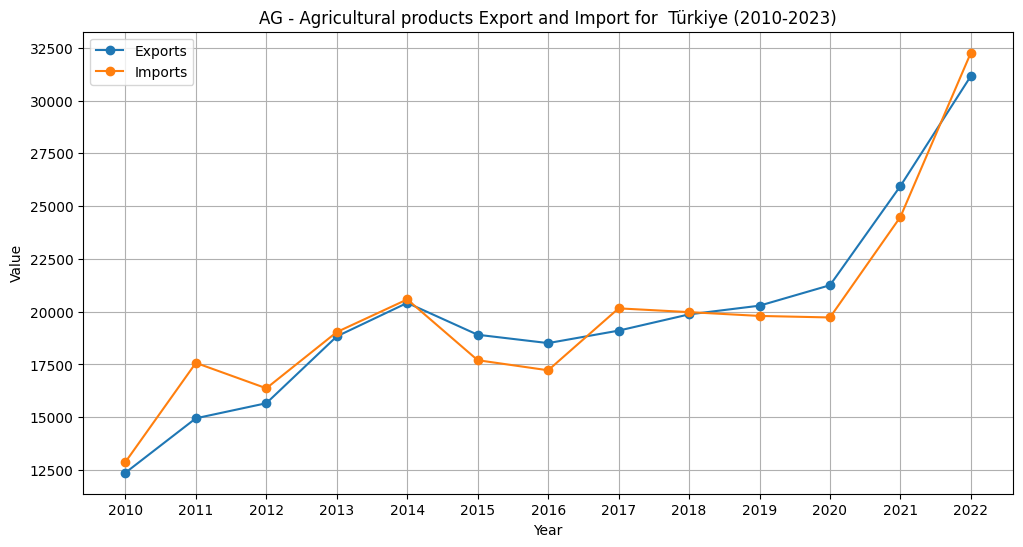

In [174]:
Country = 'Türkiye'
Product_sector = 'AG - Agricultural products'

# Filter your selected country and product data
TradeData_ag = TradeData[(TradeData['Country'] == Country ) & (TradeData['Product/Sector'].str.contains(Product_sector))]

# Pull annual data into a list
years = [str(year) for year in range(2010, 2023)]
exports = TradeData_ag[TradeData_ag['Mercantile_type'] == 'Export'][years].values[0]
imports = TradeData_ag[TradeData_ag['Mercantile_type'] == 'Import'][years].values[0]

# Drawing graphs
plt.figure(figsize=(12, 6))
plt.plot(years, exports, label='Exports', marker='o')
plt.plot(years, imports, label='Imports', marker='o')
plt.xlabel('Year')
plt.ylabel('Value')
plt.title(f'{Product_sector} Export and Import for  {Country} (2010-2023)')
plt.legend()
plt.grid(True)
plt.show()

look at total imports and exports between 2010-2023

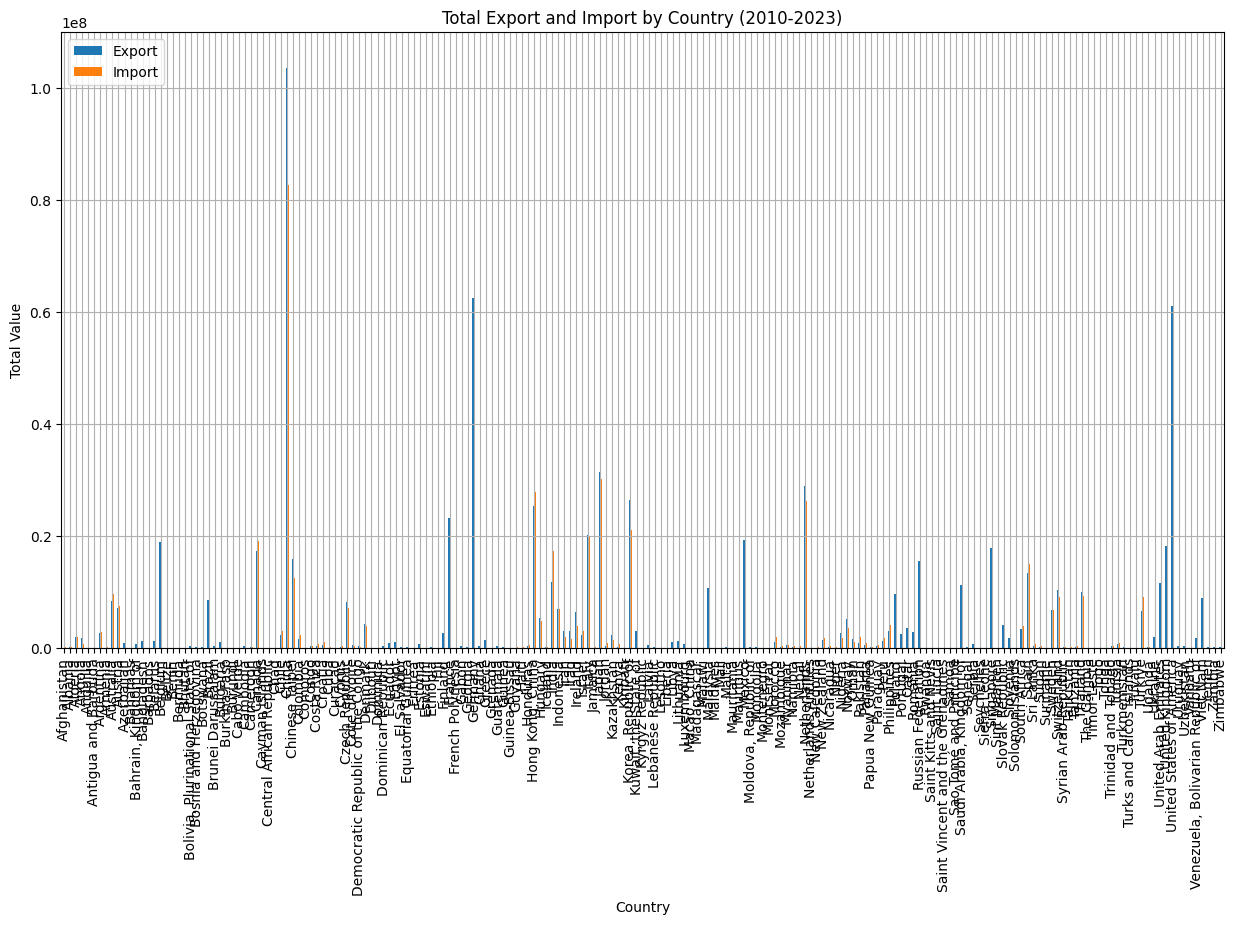

In [175]:
years = [str(year) for year in range(2010, 2023)]

#Calculating total exports and imports
total_export = TradeData[TradeData['Mercantile_type'] == 'Export'].groupby('Country')[list(years)].sum().sum(axis=1)
total_import = TradeData[TradeData['Mercantile_type'] == 'Import'].groupby('Country')[list(years)].sum().sum(axis=1)

# Convert data to a DataFrame
total_trade = pd.DataFrame({'Export': total_export, 'Import': total_import})

# Drawing graphs
total_trade.plot(kind='bar', figsize=(15, 8))
plt.title('Total Export and Import by Country (2010-2023)')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

It's very complicated so let's edit the code in case we want to get the first 10 or more

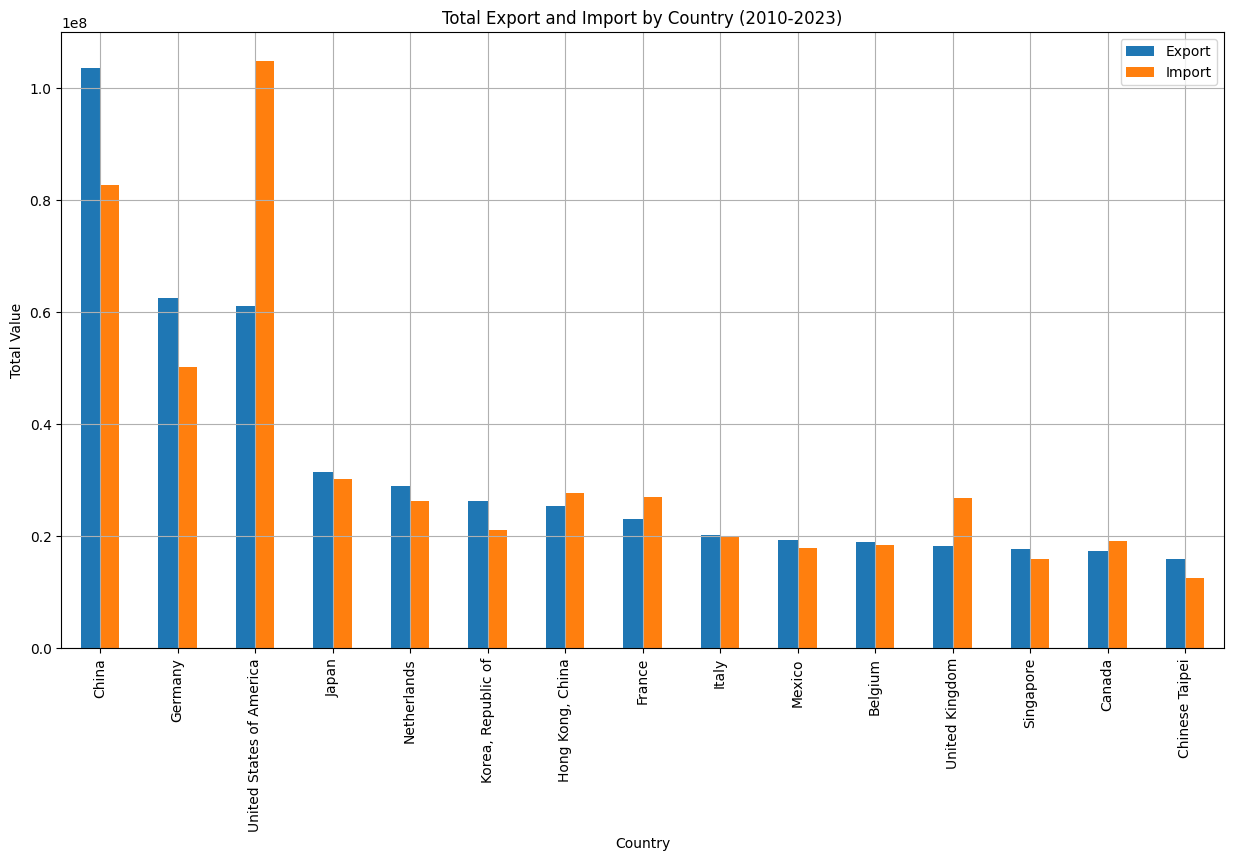

In [176]:
years = [str(year) for year in range(2010, 2023)]
sort_by_trade="Export"

# Calculating total exports and imports
total_export = TradeData[TradeData['Mercantile_type'] == 'Export'].groupby('Country')[list(years)].sum().sum(axis=1)
total_import = TradeData[TradeData['Mercantile_type'] == 'Import'].groupby('Country')[list(years)].sum().sum(axis=1)

# Convert data to a DataFrame
total_trade = pd.DataFrame({'Export': total_export, 'Import': total_import})
total_trade = total_trade.sort_values(by=sort_by_trade, ascending=False).head(15)


# Drawing graphs
total_trade.plot(kind='bar', figsize=(15, 8))
plt.title('Total Export and Import by Country (2010-2023)')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

it's more understandable now

Let's filter the data for a specific sector

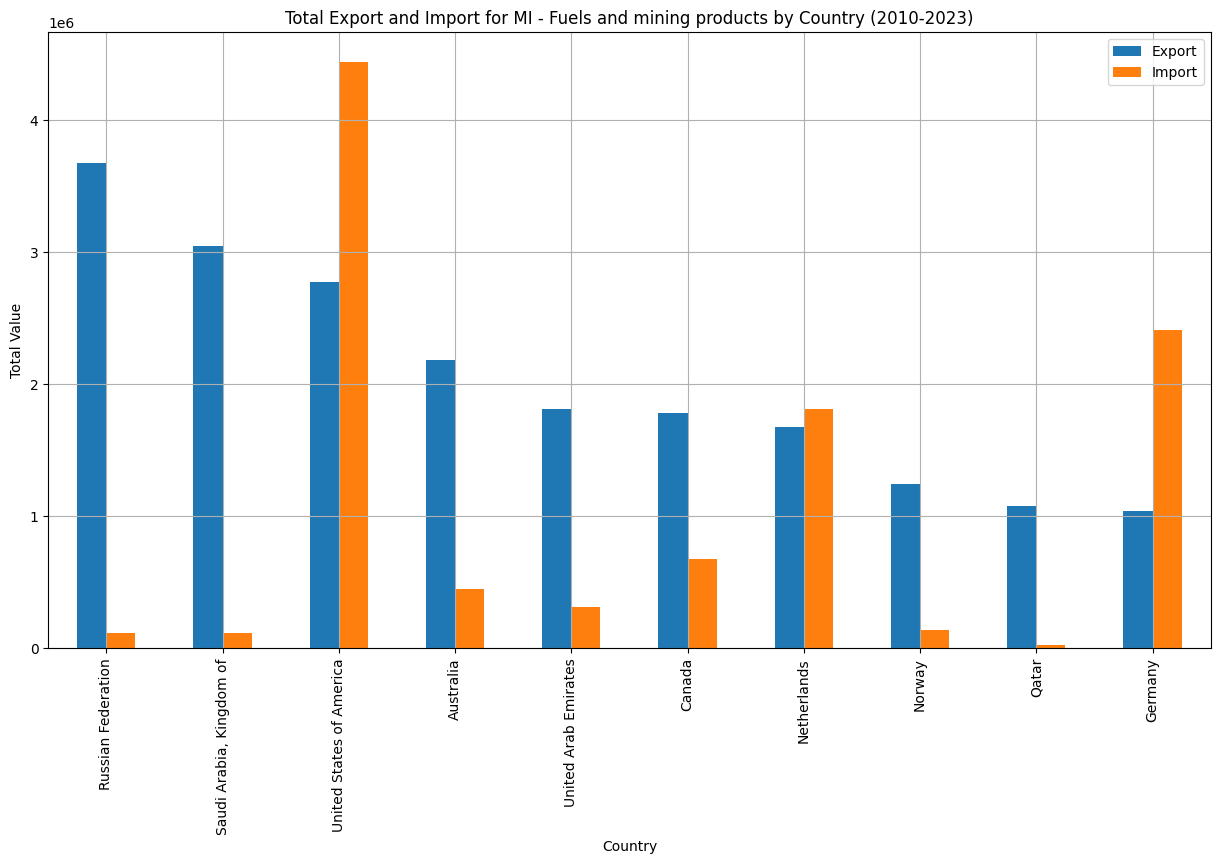

In [177]:
years = [str(year) for year in range(2010, 2023)]
sort_by_trade="Export"

# Filter data for a specific industry
sector = 'MI - Fuels and mining products'
TradeData_sector = TradeData[TradeData['Product/Sector'].str.contains(sector)]

# Calculating exports and imports by country
sector_export = TradeData_sector[TradeData_sector['Mercantile_type'] == 'Export'].groupby('Country')[list(years)].sum().sum(axis=1)
sector_import = TradeData_sector[TradeData_sector['Mercantile_type'] == 'Import'].groupby('Country')[list(years)].sum().sum(axis=1)

# Calculating exports and imports by country
sector_trade = pd.DataFrame({'Export': sector_export, 'Import': sector_import})
sector_trade = sector_trade.sort_values(by=sort_by_trade, ascending=False).head(10)

# Drawing graphs
sector_trade.plot(kind='bar', figsize=(15, 8))
plt.title(f'Total Export and Import for {sector} by Country (2010-2023)')
plt.xlabel('Country')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

To get a broader look, we can also look at it with a pie chart.

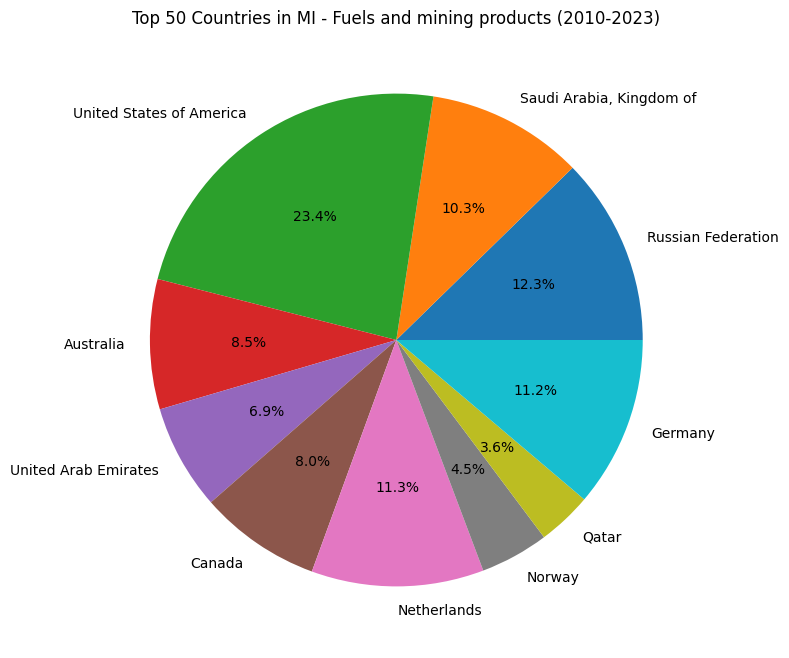

In [178]:
sector_trade = sector_trade.sort_values(by=sort_by_trade, ascending=False).head(50)

sector_trade['Total'] = sector_trade['Export'] + sector_trade['Import']

sector_trade['Total'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title(f'Top 50 Countries in {sector} (2010-2023)')
plt.ylabel('')
plt.show()

Let's look at the relationship between years

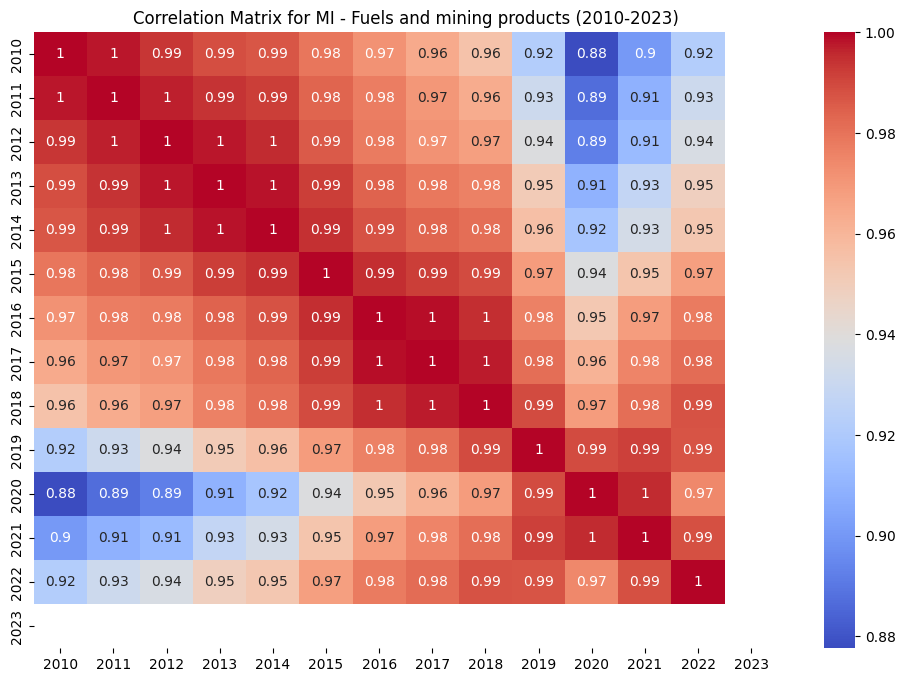

In [179]:
# Filter data for a specific industry
sector = 'MI - Fuels and mining products'
TradeData_sector = TradeData[TradeData['Product/Sector'].str.contains(sector)]

# Select numeric columns
numeric_columns = list(map(str, range(2010, 2024)))
TradeData_numeric = TradeData_sector[numeric_columns]

# Calculating the correlation matrix
correlation_matrix = TradeData_numeric.corr()

# Draw a heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title(f'Correlation Matrix for {sector} (2010-2023)')
plt.show()

**The amount of increase in 2022 is clearly visible**

Let's look at the most import and export by product.

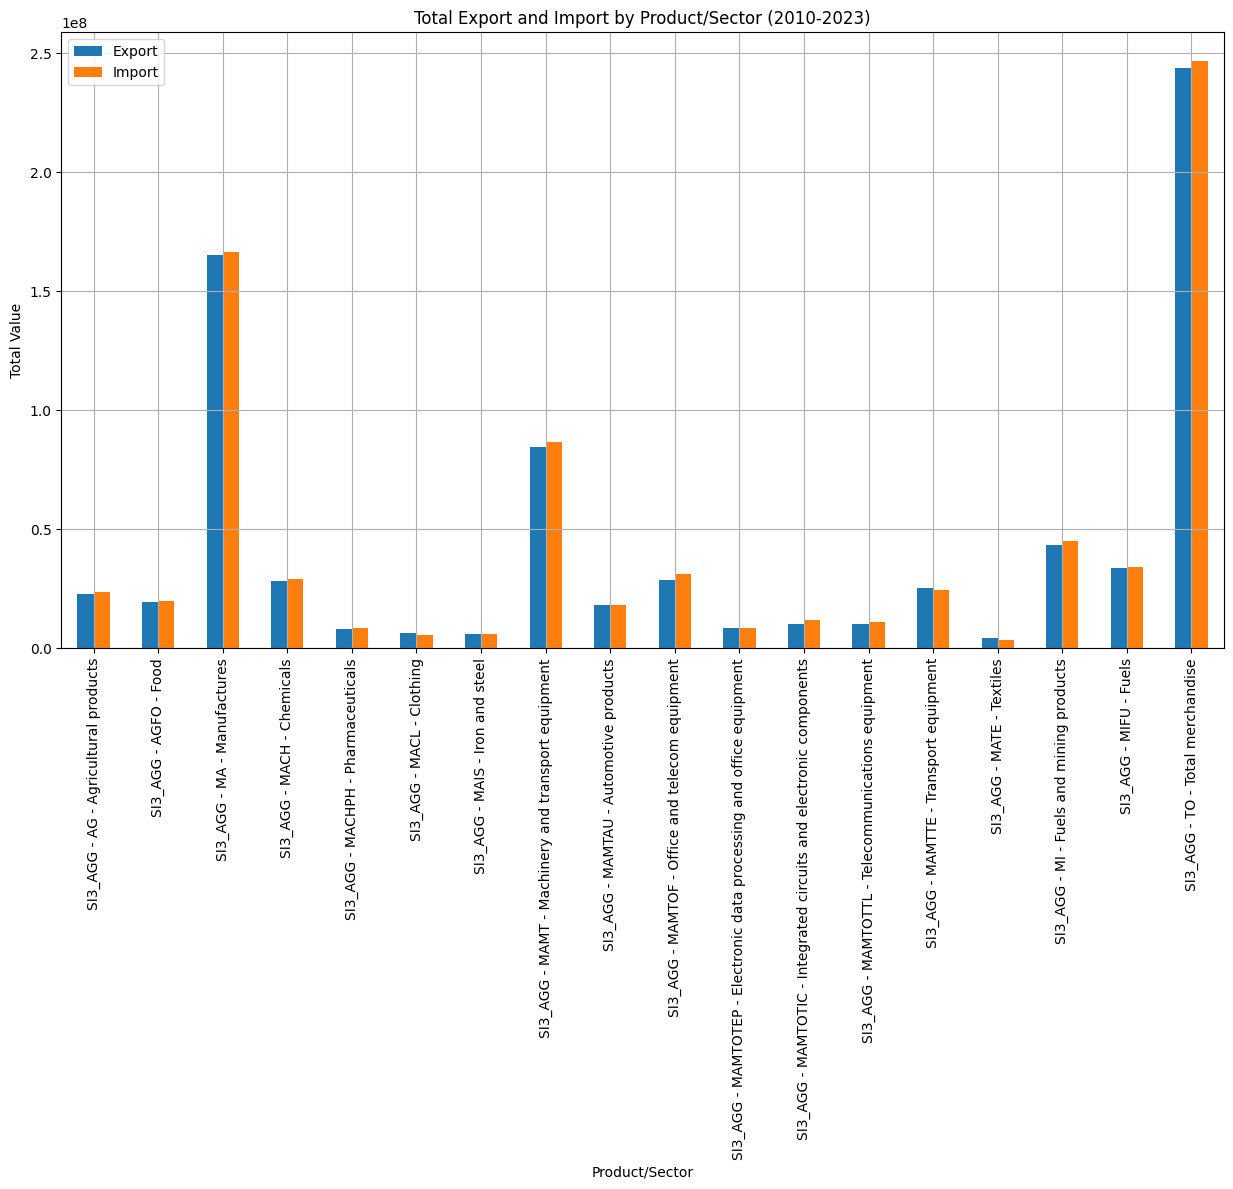

In [212]:
years = [str(year) for year in range(2010, 2023)]


total_export = TradeData[TradeData['Mercantile_type'] == 'Export'].groupby('Product/Sector')[list(years)].sum().sum(axis=1)
total_import = TradeData[TradeData['Mercantile_type'] == 'Import'].groupby('Product/Sector')[list(years)].sum().sum(axis=1)


total_trade = pd.DataFrame({'Export': total_export, 'Import': total_import})


total_trade.plot(kind='bar', figsize=(15, 8))
plt.title('Total Export and Import by Product/Sector (2010-2023)')
plt.xlabel('Product/Sector')
plt.ylabel('Total Value')
plt.grid(True)
plt.show()

Most of the trade took place in the manufacturer sector

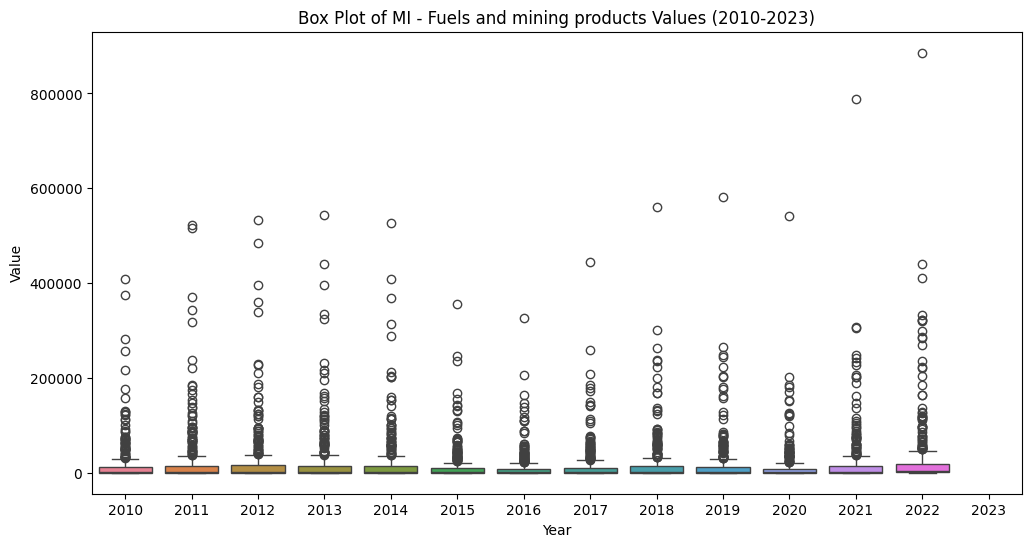

In [180]:
# Filter data for a specific industry
sector = 'MI - Fuels and mining products'
TradeData_sector = TradeData[TradeData['Product/Sector'].str.contains(sector)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=TradeData_sector[list(map(str, range(2010, 2024)))])
plt.title(f'Box Plot of {sector} Values (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

### **Feature Engineering**

Trade balance refers to the difference between a country's exports and imports. A positive trade balance (trade surplus) indicates that a country's exports exceed its imports, while a negative trade balance (trade deficit) indicates that imports exceed its exports.


* Trade Surplus: Countries with a positive trade balance indicate that they are successful in exports and strong in the global market.
* Trade Deficit: Countries with a negative trade balance may indicate that imports exceed exports and experience economic imbalances.


Let's examine the trade deficits.


In [184]:
# Creating pivot tables
export_data = TradeData[TradeData['Mercantile_type'] == 'Export'].pivot_table(index='Country', values=years, aggfunc='sum')
import_data = TradeData[TradeData['Mercantile_type'] == 'Import'].pivot_table(index='Country', values=years, aggfunc='sum')

# Calculating trade balance
trade_balance = export_data - import_data
trade_balance = trade_balance.fillna(0)  # NaN değerleri 0 ile doldurma

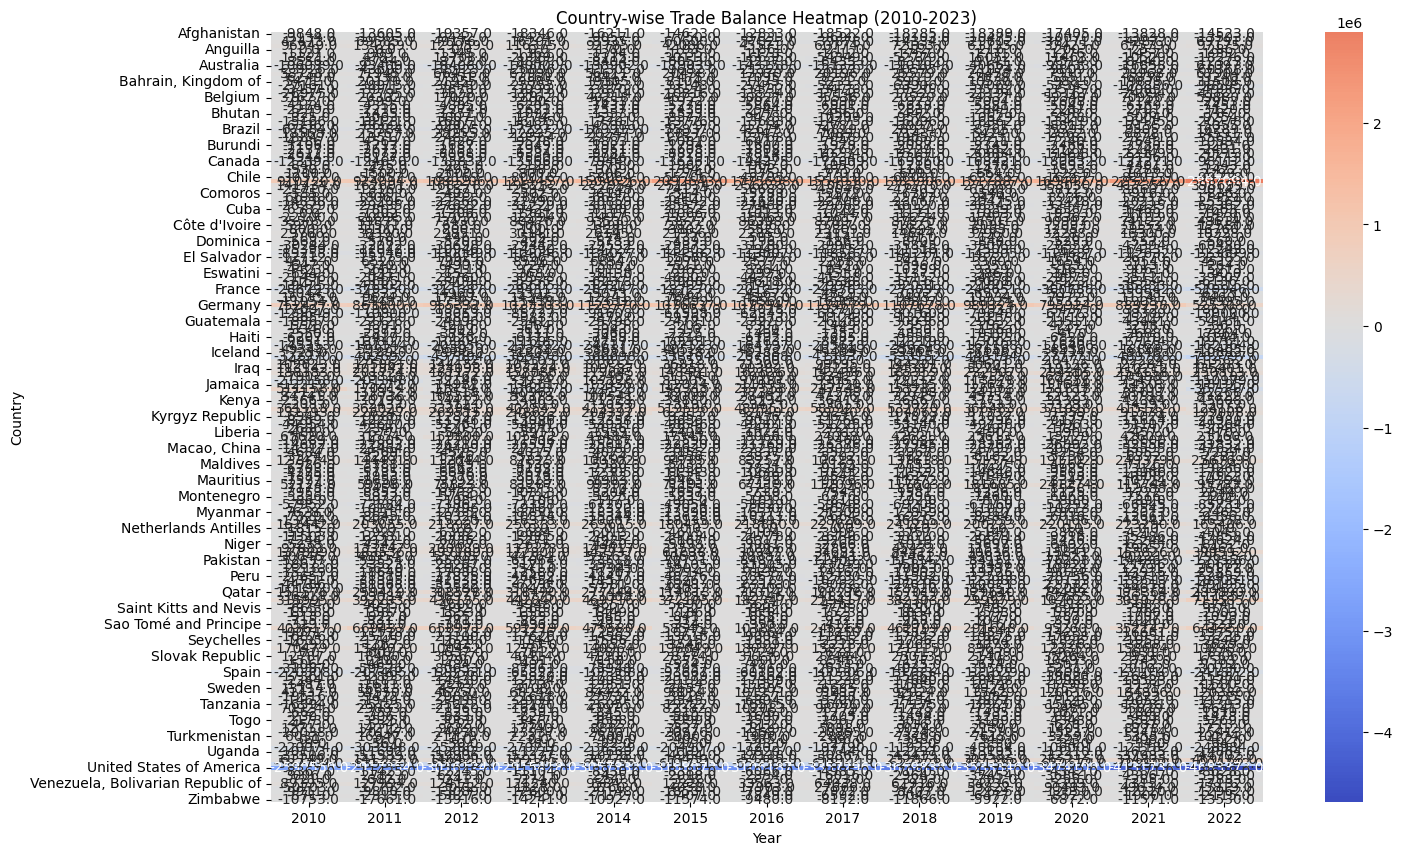

In [182]:
# Trade Balance Heat Map
plt.figure(figsize=(16, 10))
sns.heatmap(trade_balance, annot=True, fmt=".1f", cmap="coolwarm", center=0)
plt.title('Country-wise Trade Balance Heatmap (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


In [195]:
# Calculating the trade balance (example for 2020)
trade_balance['2020'] = export_data['2020'] - import_data['2020']
trade_balance = trade_balance.reset_index()

# Visualizing trade balance on world map
fig = px.choropleth(trade_balance,
                    locations="Country",
                    locationmode='country names',
                    color="2020",
                    hover_name="Country",
                    color_continuous_scale=px.colors.diverging.PiYG,
                    color_continuous_midpoint=0,
                    title="Global Trade Balance (2020)")

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()


Let's look at the countries at the extremes

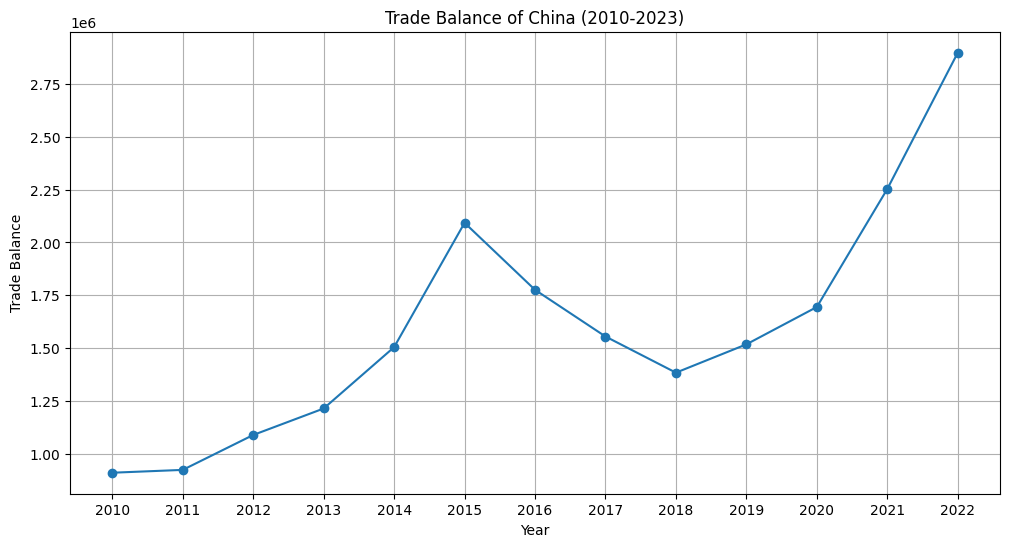

In [203]:
# Calculating trade balance
trade_balance = export_data - import_data
trade_balance = trade_balance.fillna(0)  # NaN değerleri 0 ile doldurma

# Annual Trade Balance Chart of a Particular Country
country = 'China'  

plt.figure(figsize=(12, 6))
plt.plot(trade_balance.columns, trade_balance.loc[country], marker='o')
plt.title(f'Trade Balance of {country} (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Trade Balance')
plt.grid(True)
plt.show()

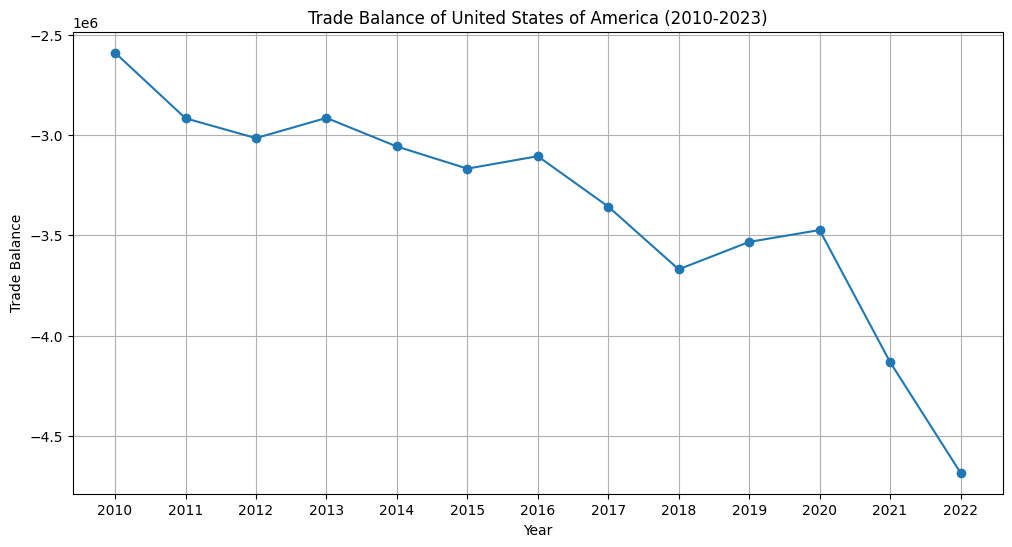

In [204]:
# Annual Trade Balance Chart of a Particular Country
country = 'United States of America'  

plt.figure(figsize=(12, 6))
plt.plot(trade_balance.columns, trade_balance.loc[country], marker='o')
plt.title(f'Trade Balance of {country} (2010-2023)')
plt.xlabel('Year')
plt.ylabel('Trade Balance')
plt.grid(True)
plt.show()